In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn import metrics
from sklearn.svm import LinearSVC, SVC
from sklearn.model_selection import KFold
from sklearn import metrics


In [2]:
csv_data = pd.read_csv('database.csv')

In [3]:
csv_data = csv_data.drop('Unnamed: 0',axis = 1)   #消除第0行

In [4]:
'''label_name = {
    0:'success',
    1:'fail',
    2:'noExtusion'
}

csv_data['label'] = csv_data['label'].map(label_name)   #將label的0 1 2置換成列印狀態
'''
csv_data

,HG_mostNum,HG_std,HG_val,HG_entropy,GLCM_asm,GLCM_contrast,GLCM_entropt,GLCM_idm,label
0,8,4.218388,0.569705,3.568960,1.000000,0.000000,0.000000,1.000000,0
1,8,4.039544,0.570289,3.490376,1.000000,0.000000,0.000000,1.000000,0
2,25,12.329679,0.693612,5.047263,1.000000,0.000000,0.000000,1.000000,0
3,11,10.854882,0.636443,4.867941,1.000000,0.000000,0.000000,1.000000,0
4,12,8.830020,0.597029,4.548500,1.000000,0.000000,0.000000,1.000000,0
5,11,10.374794,0.628511,4.671535,1.000000,0.000000,0.000000,1.000000,0
6,12,18.659241,0.698403,5.227786,1.000000,0.000000,0.000000,1.000000,0
7,8,4.420097,0.619308,3.611114,1.000000,0.000000,0.000000,1.000000,0
8,7,5.418079,0.665277,3.899330,1.000000,0.000000,0.000000,1.000000,0
9,7,4.433054,0.628771,3.631465,1.000000,0.000000,0.000000,1.000000,0


In [5]:
# 判斷是否重複
csv_data.duplicated()
#移除重複數據
csv_data = csv_data.drop_duplicates()
csv_data

,HG_mostNum,HG_std,HG_val,HG_entropy,GLCM_asm,GLCM_contrast,GLCM_entropt,GLCM_idm,label
0,8,4.218388,0.569705,3.568960,1.000000,0.000000,0.000000,1.000000,0
1,8,4.039544,0.570289,3.490376,1.000000,0.000000,0.000000,1.000000,0
2,25,12.329679,0.693612,5.047263,1.000000,0.000000,0.000000,1.000000,0
3,11,10.854882,0.636443,4.867941,1.000000,0.000000,0.000000,1.000000,0
4,12,8.830020,0.597029,4.548500,1.000000,0.000000,0.000000,1.000000,0
5,11,10.374794,0.628511,4.671535,1.000000,0.000000,0.000000,1.000000,0
6,12,18.659241,0.698403,5.227786,1.000000,0.000000,0.000000,1.000000,0
7,8,4.420097,0.619308,3.611114,1.000000,0.000000,0.000000,1.000000,0
8,7,5.418079,0.665277,3.899330,1.000000,0.000000,0.000000,1.000000,0
9,7,4.433054,0.628771,3.631465,1.000000,0.000000,0.000000,1.000000,0


In [6]:
display(csv_data.describe())      #使用describe()函數查看每一列的描述性統計量

,HG_mostNum,HG_std,HG_val,HG_entropy,GLCM_asm,GLCM_contrast,GLCM_entropt,GLCM_idm,label
count,39134.000000,39134.000000,39134.000000,39134.000000,39134.000000,39134.000000,39134.000000,39134.000000,39134.000000
mean,91.123831,20.711498,0.367254,5.078824,0.725636,0.069655,0.547527,0.965201,0.687612
std,61.396669,17.151831,0.382916,0.950514,0.251180,0.073504,0.482767,0.036714,0.680469
min,1.000000,2.161411,0.016230,1.996114,0.173564,0.000000,0.000000,0.811594,0.000000
25%,13.000000,7.084951,0.088658,4.302065,0.483277,0.000000,0.000000,0.943841,0.000000
50%,114.000000,15.440106,0.181210,5.117294,0.765995,0.047101,0.517188,0.976449,1.000000
75%,137.000000,27.814151,0.536485,5.807301,1.000000,0.112319,0.951158,1.000000,1.000000
max,194.000000,100.997025,1.891735,7.211311,1.000000,0.376812,1.852443,1.000000,2.000000


###  進行validation 將資料分為五等分    其中四等拿來train 一等拿來test  ,故可訓練出五種分類器

In [7]:
k_fold = KFold(n_splits=5, shuffle=True, random_state=0)
model = SVC(C = 1.0 ,kernel = 'rbf' ,random_state=0 ,decision_function_shape = 'ovo')
Features = csv_data.drop('label',axis=1)
Label = csv_data['label']

In [8]:
accuracies = []
confmats = []
for train_index, test_index in k_fold.split(Label):
    #print(np.shape(test_index))
    #print(np.shape(train_index))
    trained = model.fit(Features.loc[train_index].values, Label.loc[train_index].values)
    X_test = Features.loc[test_index].values
    y_test = Label.loc[test_index].values
    accuracies.append(trained.score(X_test, y_test))
    y_pred = model.predict(X_test)
    confmats.append(metrics.confusion_matrix(y_test, y_pred))
    

In [9]:
accuracies  #五個模型的準確度

[0.8707039734253226,
 0.8630382010987607,
 0.8632937268429794,
 0.8649546441804011,
 0.8659596217735752]

In [10]:
acc = np.array(accuracies)
print("平均值 = {:f}".format(np.average(acc)))              #沒有作特徵判斷的話  0.941756
print("標準差 = {:f}".format(np.std(acc)))                  #                  0.006991

平均值 = 0.865590
標準差 = 0.002774


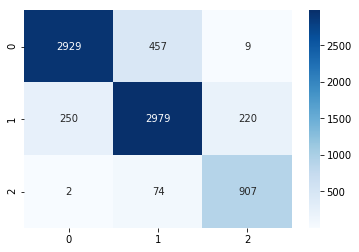

In [11]:
sns.heatmap(confmats[0], cmap="Blues", annot=True, fmt="d")

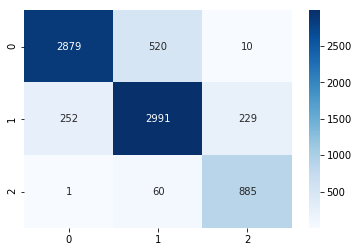

In [12]:
sns.heatmap(confmats[1], cmap="Blues", annot=True, fmt="d")

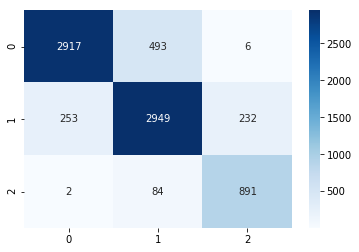

In [13]:
sns.heatmap(confmats[2], cmap="Blues", annot=True, fmt="d")

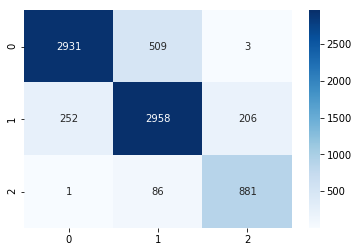

In [14]:
sns.heatmap(confmats[3], cmap="Blues", annot=True, fmt="d")

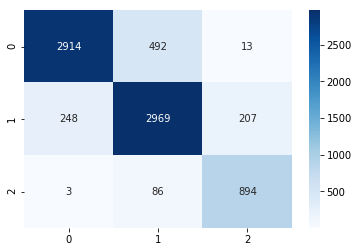

In [15]:
sns.heatmap(confmats[4], cmap="Blues", annot=True, fmt="d")

## 探索資料

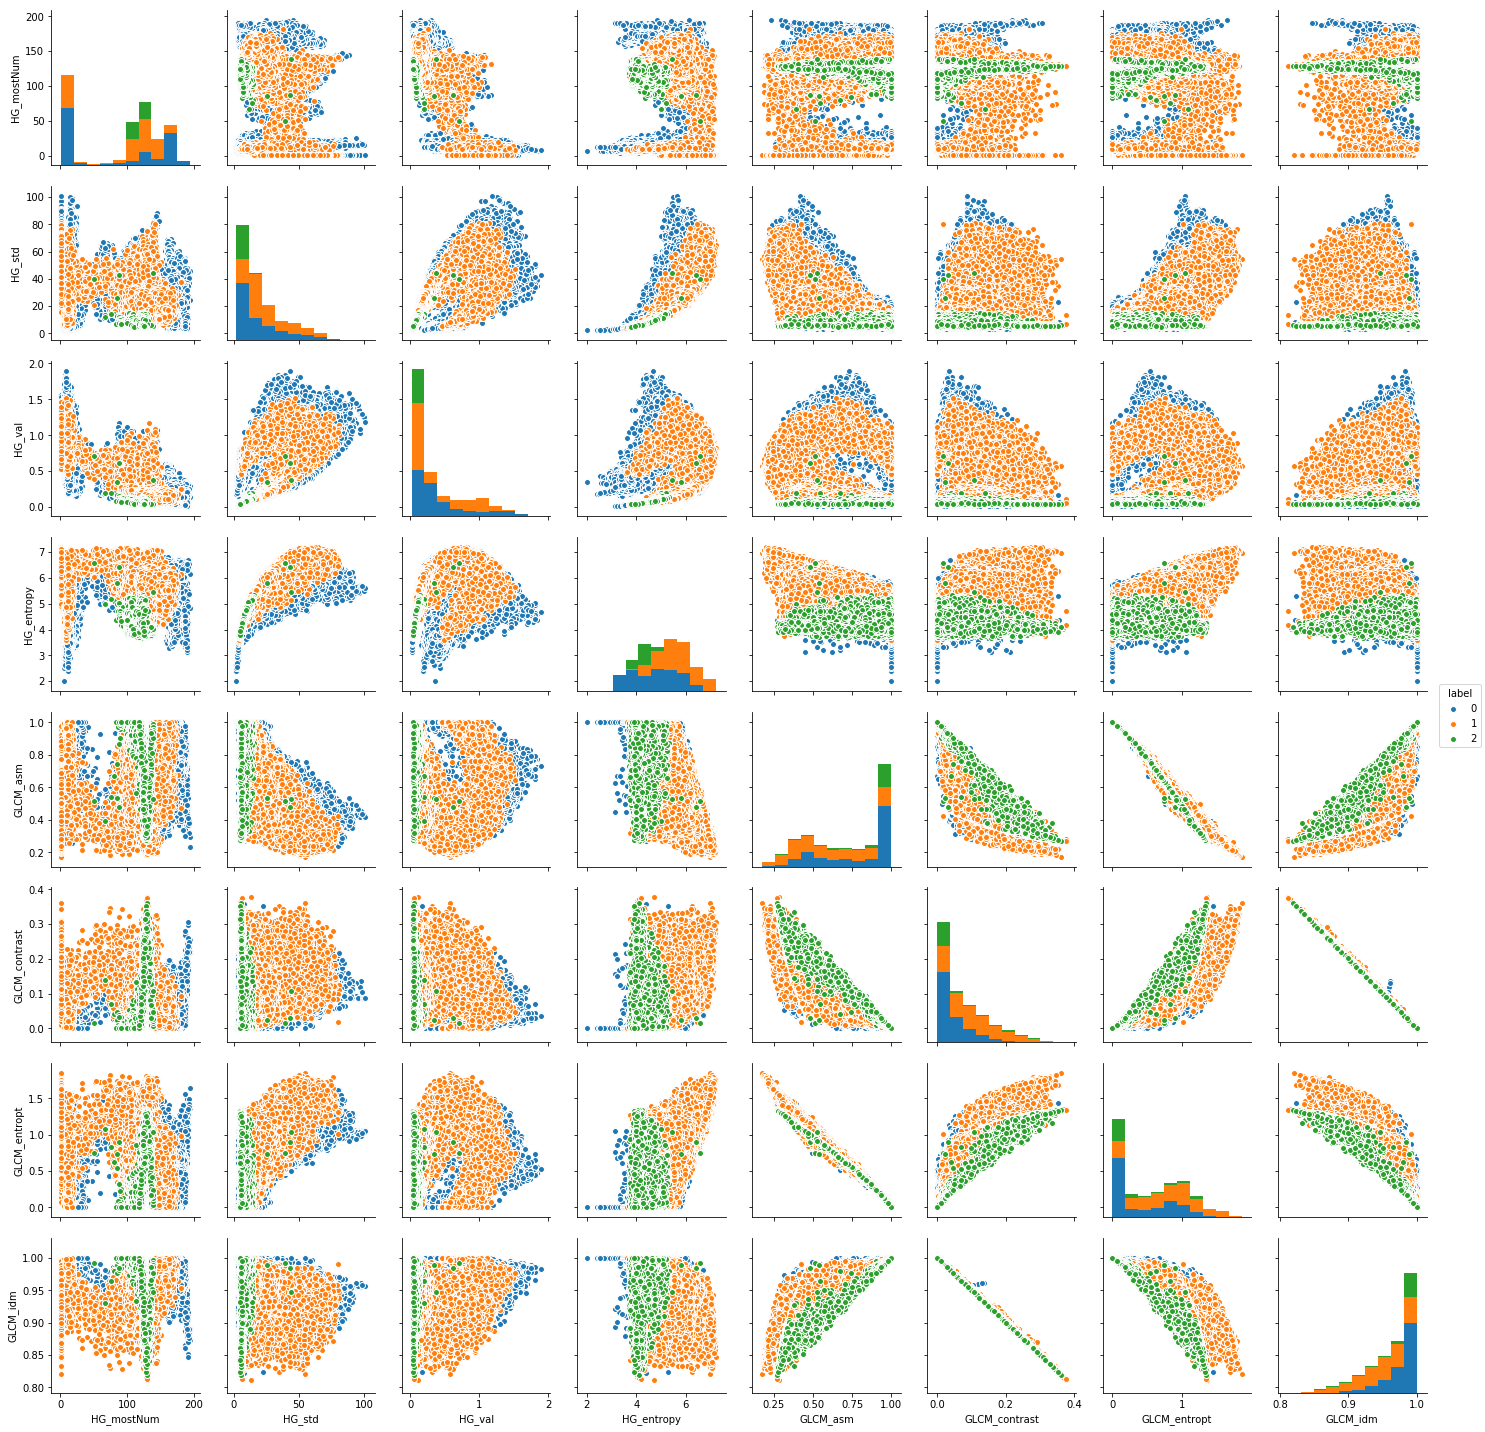

In [16]:
show_features = ["HG_mostNum", "HG_std", "HG_val", "HG_entropy","GLCM_asm","GLCM_contrast","GLCM_entropt","GLCM_idm"]
sns.pairplot(data=csv_data, hue="label", x_vars=show_features, y_vars=show_features)

### 挑選了有辦法肉眼分類的特徵來當作我們訓練用的特徵 :  HG_entropy於HG_std , HG_val(可肉眼分三類)
###            分1跟2兩類的特徵(代表1類可能事範圍極小的圓)，並且去掉重複的: GLCM的asm和entropy於idm 

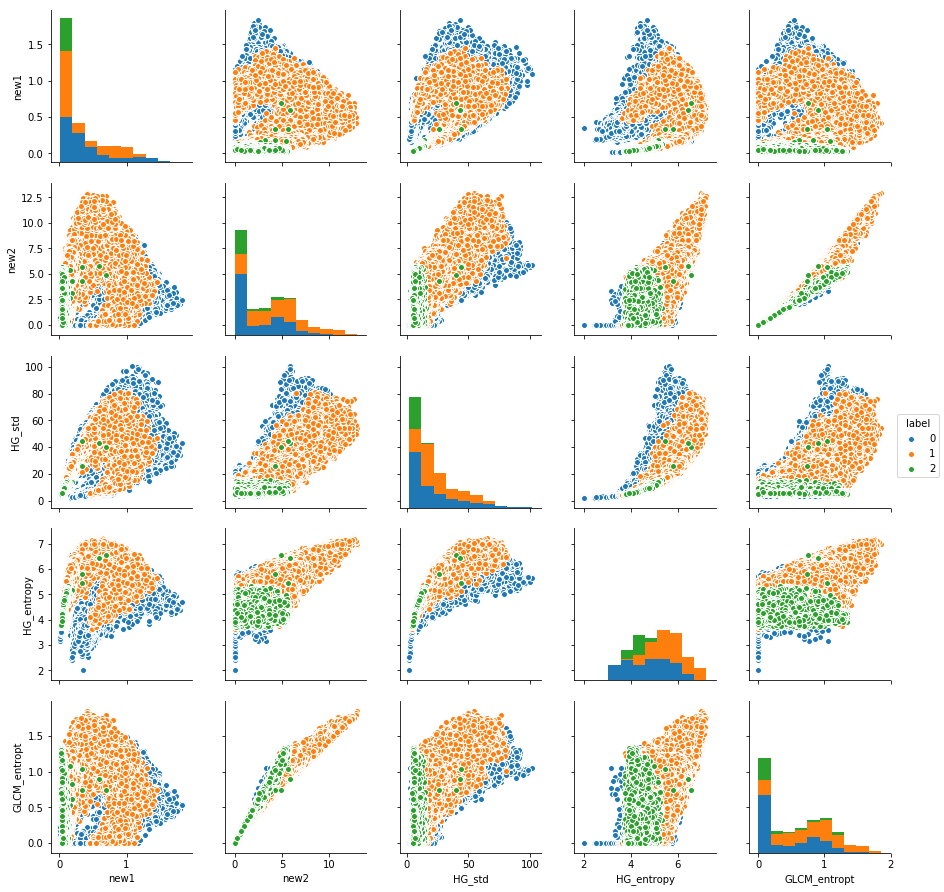

In [76]:
#將這兩種結合創造新的特徵看可否明顯地分出三類
#csv_data['new1'] = csv_data["HG_entropy"] / csv_data["GLCM_idm"]             0.951
#csv_data['new2'] = csv_data["HG_entropy"] / csv_data["HG_val"]

csv_data['new1'] = csv_data["HG_val"] / (csv_data["GLCM_contrast"]+1)
csv_data['new2'] = csv_data["HG_entropy"] * csv_data["GLCM_entropt"]
show_features = ["new1", "new2"  , "HG_std" ,"HG_entropy" ,"GLCM_entropt"]
sns.pairplot(data=csv_data, hue="label", x_vars=show_features, y_vars=show_features)

In [113]:
#可明顯分離正常狀態k_fold = KFold(n_splits=5, shuffle=True, random_state=0)
model = SVC(C = 1.0 ,kernel = 'rbf',random_state=0 ,decision_function_shape = 'ovo')
features = ["new1" , "new2","HG_entropy","HG_mostNum", "HG_std", "GLCM_asm","GLCM_entropt"]
Features = csv_data[features]
Label = csv_data['label']


In [114]:
accuracies = []
confmats = []
for train_index, test_index in k_fold.split(Label):
    #print(np.shape(test_index))
    #print(np.shape(train_index))
    trained = model.fit(Features.loc[train_index].values, Label.loc[train_index].values)
    X_test = Features.loc[test_index].values
    y_test = Label.loc[test_index].values
    accuracies.append(trained.score(X_test, y_test))
    y_pred = model.predict(X_test)
    confmats.append(metrics.confusion_matrix(y_test, y_pred))

In [115]:
accuracies

[0.8828414462757123,
 0.8795196116008688,
 0.8777309313913377,
 0.8776031685192283,
 0.8782264247380527]

In [116]:
acc = np.array(accuracies)
print("平均值 = {:f}".format(np.average(acc)))              #0.953747
print("標準差 = {:f}".format(np.std(acc)))                  #0.003545

平均值 = 0.879184
標準差 = 0.001950


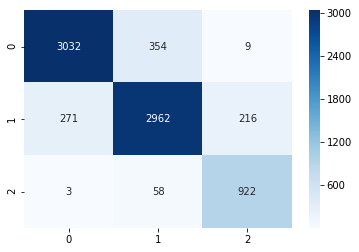

In [84]:
sns.heatmap(confmats[0], cmap="Blues", annot=True, fmt="d")

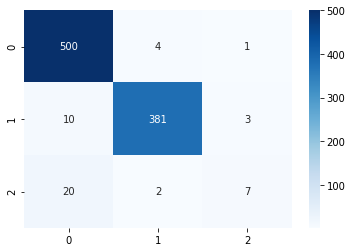

In [73]:
sns.heatmap(confmats[1], cmap="Blues", annot=True, fmt="d")

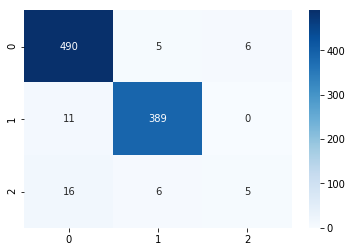

In [74]:
sns.heatmap(confmats[2], cmap="Blues", annot=True, fmt="d")

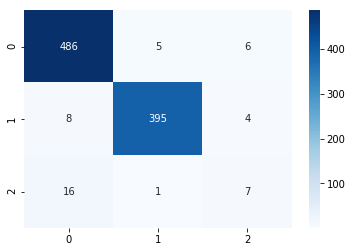

In [75]:
sns.heatmap(confmats[3], cmap="Blues", annot=True, fmt="d")

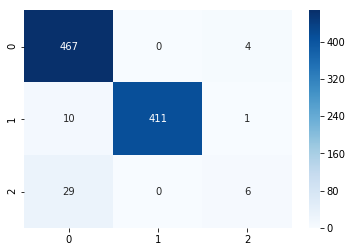

In [76]:
sns.heatmap(confmats[4], cmap="Blues", annot=True, fmt="d")